## Importando as bibliotecas necessarias

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

#nltk.download('stopwords')

#### Carregando os dados de treinamento e teste

In [2]:
# Carregando os conjuntos de treinamento e teste
df_train = pd.read_csv('IMDB_train.csv')
df_test = pd.read_csv('IMDB_test.csv')

#### Mostrando as 10 primeiras linhas do dataset de treinamento e de teste

In [3]:
df_train.head(10)

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...
5,Pos,when i first heard of contact the hype was ...
6,Pos,you ve got to love disney no matter what t...
7,Pos,with three pre to mid teen children and an a...
8,Pos,i hate to burst your bubble but after all t...
9,Pos,susan granger s review of osmosis jones ...


In [4]:
df_test.head(10)

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
5,Pos,on june 30 1960 a self taught idealisti...
6,Pos,apparently director tony kaye had a major b...
7,Pos,one of my colleagues was surprised when i tol...
8,Pos,after bloody clashes and independence won l...
9,Pos,the american action film has been slowly drow...


#### Mostrando as últimas linhas dos datasets de treinamento e de teste

In [5]:
df_train.tail()

,class,text
1595,Neg,if anything stigmata should be taken as...
1596,Neg,john boorman s zardoz is a goofy cinemati...
1597,Neg,the kids in the hall are an acquired taste ...
1598,Neg,there was a time when john carpenter was a gr...
1599,Neg,two party guys bob their heads to haddaway s ...


In [6]:
df_test.tail()

,class,text
395,Neg,one of the first films of 1999 is this mtv pi...
396,Neg,susan granger s review of america s sweethe...
397,Neg,susan granger s review of jeepers creepers ...
398,Neg,this independent film written and directed by...
399,Neg,come on hollywood surprise me stop givin...


### Mostrando o shape dos datasets de treinamento e teste

In [7]:
df_train.shape

(1600, 2)

In [8]:
# print data(feature)shape
df_test.shape

(400, 2)

#### Mostrando o nome das colunas

In [9]:
df_train.columns

Index(['class', 'text'], dtype='object')

#### Renomeando o nome das colunas

In [10]:
df_train = df_train.rename(columns={'class': 'tipo', 'text': 'critica'})
df_test = df_test.rename(columns={'class': 'tipo', 'text': 'critica'})

#### Transformando o target "tipo" para 0 - Neg e 1 - Pos

In [11]:
# Importação de LabelEncoder
from sklearn import preprocessing

# criando labelEncoder
le = preprocessing.LabelEncoder()

df_train['tipo']=le.fit_transform(df_train.tipo)
df_test['tipo']=le.fit_transform(df_test.tipo)
df_train.head()

,tipo,critica
0,1,a common complaint amongst film critics is ...
1,1,whew this film oozes energy the kind of b...
2,1,steven spielberg s amistad which is bas...
3,1,he has spent his entire life in an awful litt...
4,1,being that it is a foreign language film with...


#### Verifica se estao faltando valores

In [12]:
df_train.isna().sum()

tipo       0
critica    0
dtype: int64

In [13]:
df_test.isna().sum()

tipo       0
critica    0
dtype: int64

#### Mostrando como as variáveis ficaram após as transformações

In [14]:
critica, tipo = df_train.critica, df_train.tipo

In [15]:
print(critica)
print(tipo)

0        a common complaint amongst film critics is   ...
1        whew   this film oozes energy   the kind of b...
2        steven spielberg s   amistad     which is bas...
3        he has spent his entire life in an awful litt...
4        being that it is a foreign language film with...
                              ...                        
1595     if anything     stigmata   should be taken as...
1596     john boorman s   zardoz   is a goofy cinemati...
1597     the kids in the hall are an acquired taste   ...
1598     there was a time when john carpenter was a gr...
1599     two party guys bob their heads to haddaway s ...
Name: critica, Length: 1600, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
1595    0
1596    0
1597    0
1598    0
1599    0
Name: tipo, Length: 1600, dtype: int32


### Convertendo o texto para vetores numéricos utilizando o CountVectorizer

In [16]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(df_train['critica'])
test_matrix = vectorizer.transform(df_test['critica'])

print(test_matrix) 

  (0, 1)	1
  (0, 16)	1
  (0, 33)	1
  (0, 106)	1
  (0, 203)	2
  (0, 265)	1
  (0, 314)	1
  (0, 380)	1
  (0, 418)	15
  (0, 469)	1
  (0, 491)	4
  (0, 559)	2
  (0, 689)	1
  (0, 709)	1
  (0, 715)	1
  (0, 734)	1
  (0, 959)	1
  (0, 1102)	1
  (0, 1118)	1
  (0, 1192)	3
  (0, 1205)	1
  (0, 1244)	1
  (0, 1399)	1
  (0, 1425)	3
  (0, 1468)	21
  :	:
  (399, 35059)	2
  (399, 35083)	1
  (399, 35143)	3
  (399, 35255)	2
  (399, 35316)	2
  (399, 35317)	1
  (399, 35333)	1
  (399, 35336)	1
  (399, 35348)	1
  (399, 35352)	1
  (399, 35373)	1
  (399, 35406)	2
  (399, 35435)	1
  (399, 35492)	1
  (399, 35495)	1
  (399, 35621)	7
  (399, 35681)	3
  (399, 35775)	1
  (399, 35852)	1
  (399, 35854)	3
  (399, 35962)	1
  (399, 35968)	1
  (399, 36036)	2
  (399, 36037)	2
  (399, 36043)	1


### Separando a variável meta e preditoras dos conjuntos de treinamento e teste

<AxesSubplot: ylabel='tipo'>

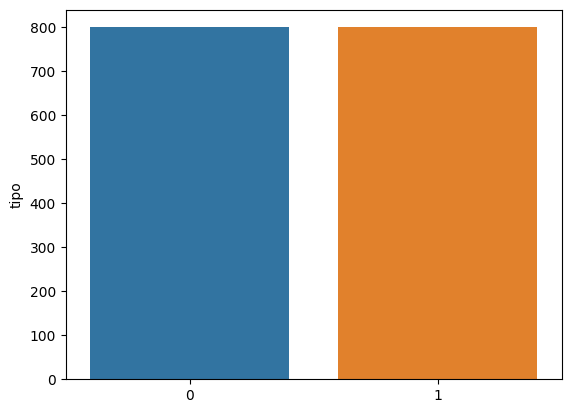

In [17]:

# Conjuntos de treinamento separados
X_train = np.asarray(train_matrix.todense())
y_train = df_train['tipo']

tipo_count_train = y_train.value_counts()
sns.barplot(x=tipo_count_train.index, y=tipo_count_train)

<AxesSubplot: ylabel='tipo'>

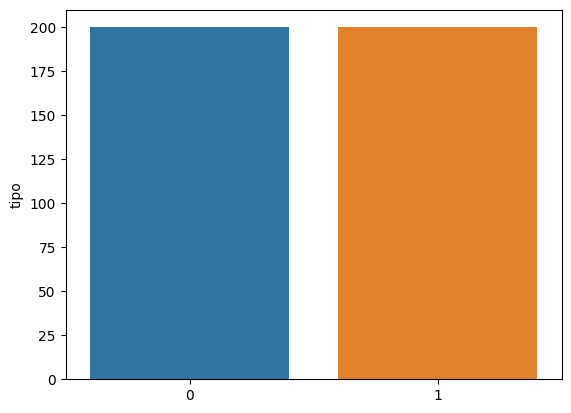

In [18]:
# Conjuntos de teste separados
X_test = np.asarray(test_matrix.todense())
y_test = df_test['tipo']
tipo_count_test = y_test.value_counts()
sns.barplot(x=tipo_count_test.index, y=tipo_count_test)

### Estatísticas e visualização dos dados

##### Contando o tamanho das criticas

In [29]:
sentence_lengths = [len(tokens) for tokens in df_train["critica"]]

In [30]:
sentence_lengths_test = [len(tokens) for tokens in df_test["critica"]]

#### Distribuição das criticas por quantidade de palavras

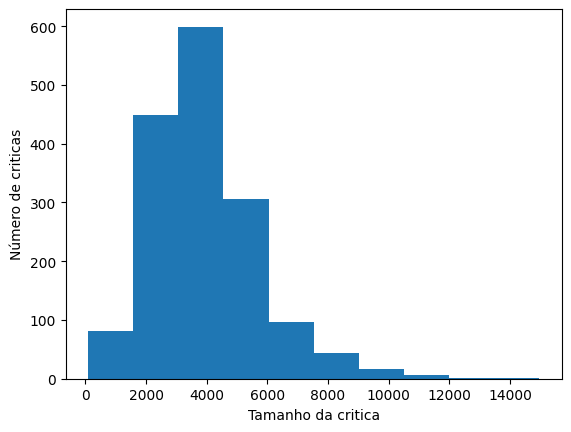

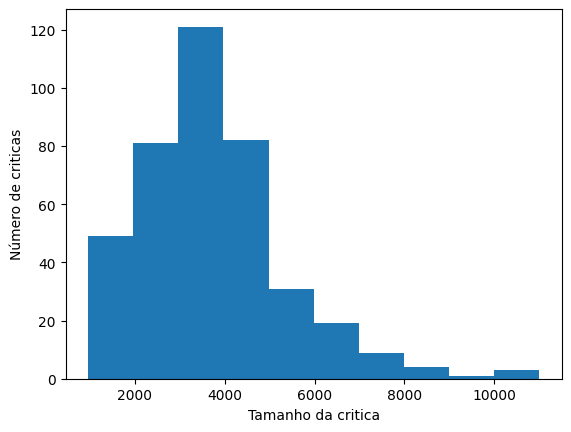

In [31]:
fig = plt.figure() 
plt.xlabel('Tamanho da critica')
plt.ylabel('Número de criticas')
plt.hist(sentence_lengths)
plt.show()

fig = plt.figure() 
plt.xlabel('Tamanho da critica')
plt.ylabel('Número de criticas')
plt.hist(sentence_lengths_test)
plt.show()

### Nuvem de palavras

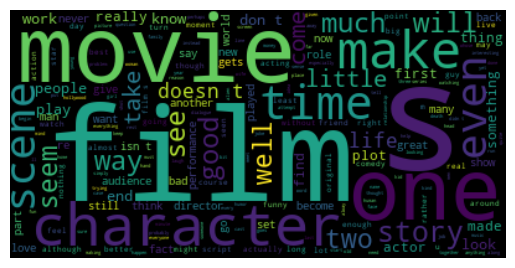

In [23]:
from wordcloud import WordCloud
textt = " ".join(critica for critica in df_train.critica)
wordcloud = WordCloud().generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

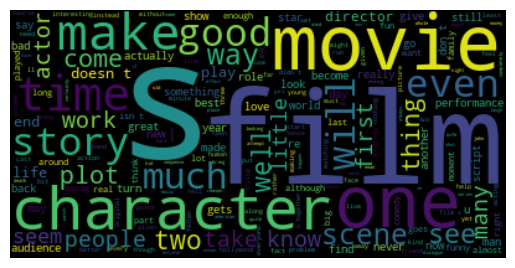

In [24]:
textt = " ".join(critica for critica in df_test.critica)
wordcloud = WordCloud().generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud12.png')
plt.show()

### Treinamento e teste do algoritmo

------------- Algoritmo Naive Bayes---------------

Acurácia do algoritmo NB : 0.6375
Precision: 0.6291079812206573
Recall: 0.67
F1 Measure: 0.6489104116222759



c:\Users\Fabiola Spredemann\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


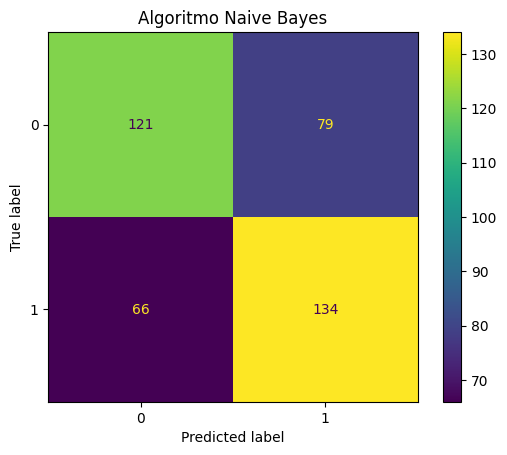

In [25]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#todense()
print("------------- Algoritmo Naive Bayes---------------\n")
## Apresenta a acurácia do modelo (NB)
print("Acurácia do algoritmo NB :",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Measure:",metrics.f1_score(y_test, y_pred))

print()


plot_confusion_matrix(model, X_test, y_test)  
plt.title("Algoritmo Naive Bayes")
plt.show()


------------- Algoritmo Random Forest--------------

Acurácia do algoritmo RF: 0.775
Precision: 0.8313253012048193
Recall: 0.69
F1 Measure: 0.7540983606557377



c:\Users\Fabiola Spredemann\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


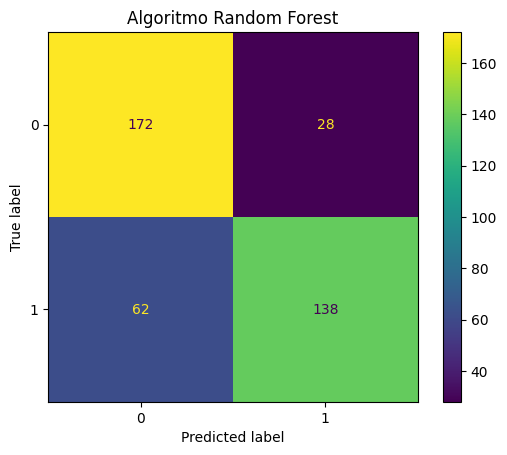

In [26]:
print("------------- Algoritmo Random Forest--------------\n")
# Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Apresenta a acurácia do modelo (Random Forest)
print("Acurácia do algoritmo RF:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Measure:",metrics.f1_score(y_test, y_pred))

print()


plot_confusion_matrix(model, X_test, y_test)  
plt.title("Algoritmo Random Forest")
plt.show()

------------- Algoritmo KNeighbors---------------

Acurácia do algoritmo KNN : 0.605
Precision: 0.6009615384615384
Recall: 0.625
F1 Measure: 0.6127450980392157



c:\Users\Fabiola Spredemann\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


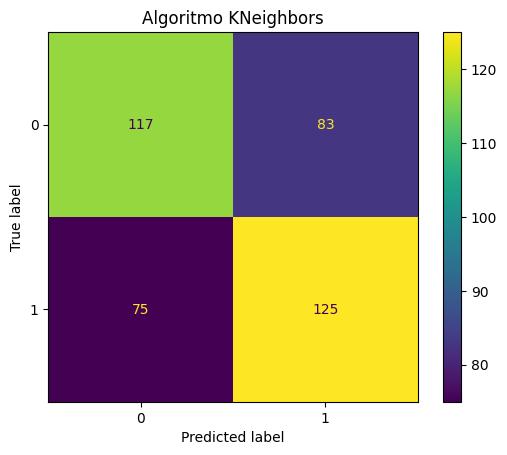

In [27]:
print("------------- Algoritmo KNeighbors---------------\n")
# KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

## Apresenta a acurácia do modelo (KNN)
print("Acurácia do algoritmo KNN :",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Measure:",metrics.f1_score(y_test, y_pred))

print()

plot_confusion_matrix(model, X_test, y_test)  
plt.title("Algoritmo KNeighbors")
plt.show()


c:\Users\Fabiola Spredemann\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Fabiola Spredemann\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


------------- Algoritmo Logistic Regression---------------

Acurácia do algoritmo Logistic Regression : 0.8075
Precision: 0.8288770053475936
Recall: 0.775
F1 Measure: 0.8010335917312661


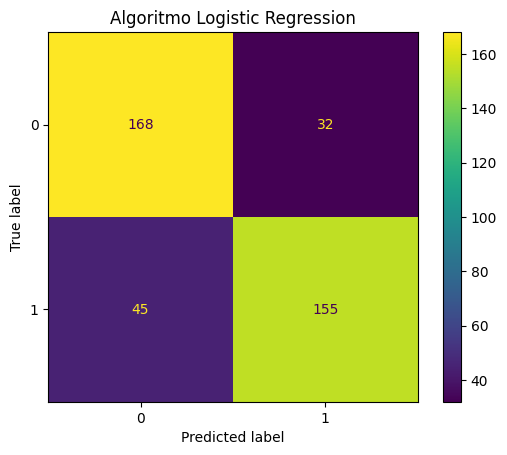

In [28]:
# Aplica o modelo LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("------------- Algoritmo Logistic Regression---------------\n")
## Apresenta a acurácia do modelo (KNN)
print("Acurácia do algoritmo Logistic Regression :",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Measure:",metrics.f1_score(y_test, y_pred))

plot_confusion_matrix(model, X_test, y_test)  
plt.title("Algoritmo Logistic Regression")
plt.show()